
# Project: Movie Revenue Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Data collected from about 10,000 movies across several years will be analyzed. The analysis will center on searching for factors that are correlated with movie revenue. In particular, characteristics about movies with high revenue will be compared with the same characteristics of movies with lower revenue. These characteristics include budget, rating, and genre.

Ultimately, this analysis seeks to answer the questions:
### Can movie budget, rating, or genre be used to predict revenue?
### Do profitable movies have different characteristics than nonprofitable movies?

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties and Cleaning

In [96]:
# Load data and print a few lines
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


For the purposes of this investigation, the columns for id, imdb_id, cast, homepage, director, tagline, overview, production_companies, keywords, runtime, and release_date are not insightful and will thus be removed for the sake of clarity. In addition, the columns for budget and revenue will be dropped in favor of their adjusted variants for a fair comparison. 

In [97]:
#remove columns for data that is not needed here
df.drop(['id', 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'overview', 'production_companies', 'release_date', 'keywords', 'budget', 'revenue','runtime'], axis= 1, inplace= True)

In [98]:
df.head()

,popularity,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [99]:
df.shape

(10866, 8)

There are 10,866 movies in this data set.

In [100]:
df.describe()

,popularity,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Most movies appear to have 0 as the adjusted budget and adjusted revenue. These must be removed to not skew the analysis, thus limiting the sample size.

In [101]:
#keep only rows where both adjusted budget and revenue are not 0
df = df[df.budget_adj != 0]
df = df[df.revenue_adj != 0]

In [102]:
df.shape

(3855, 8)

Sample size has gone from 10,866 movies to 3,855, but there are is still a good number of movies to analyze.

In [103]:
df.describe()

,popularity,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3855.000000,3855.000000,3855.00000,3855.000000,3.855000e+03,3.855000e+03
mean,1.191400,527.611933,6.16786,2001.263294,4.423630e+07,1.370294e+08
std,1.475002,879.868374,0.79504,11.281989,4.480403e+07,2.160944e+08
min,0.001117,10.000000,2.20000,1960.000000,9.693980e-01,2.370705e+00
25%,0.462448,71.000000,5.70000,1995.000000,1.309053e+07,1.834123e+07
50%,0.797298,204.000000,6.20000,2004.000000,3.001558e+07,6.171861e+07
75%,1.368245,580.000000,6.70000,2010.000000,6.061307e+07,1.632401e+08
max,32.985763,9767.000000,8.40000,2015.000000,4.250000e+08,2.827124e+09


The minimum adjusted budget is less than \\$1 and the minimum adjusted revenue is \\$2.37. These values seem unrealistic.

In [104]:
#check rows that have budgets entered below \\$1000
df[df.budget_adj < 1000]

,popularity,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
1733,0.278387,Wanted,Action|Comedy|Crime|Thriller,18,4.9,2009,76.230033,1.361977e+02
2398,0.028456,Boy,Drama|Comedy,26,7.3,2010,3.000000,4.300000e+01
2519,0.352060,Angela's Ashes,Drama,24,7.0,1999,32.726321,1.701769e+01
2618,0.090186,Lost & Found,Comedy|Romance,14,4.8,1999,1.309053,1.309053e+02
3581,0.520430,"Love, Wedding, Marriage",Comedy|Romance,55,5.3,2011,0.969398,1.335831e+03
3608,0.463510,From Prada to Nada,Comedy|Drama|Romance,47,5.2,2011,90.154018,2.423495e+06
3853,0.098896,William & Kate,Drama|Romance,18,5.9,2011,19.387961,1.454097e+01
3968,0.958182,The Sum of All Fears,Thriller|Action|Drama,256,5.7,2002,82.433775,2.339664e+02
4675,0.316117,Joyful Noise,Comedy|Music,25,6.7,2012,23.743607,2.849233e+01
5162,0.208637,Kid's Story,Science Fiction|Animation,16,6.8,2003,11.853526,5.926763e+00


In [105]:
#check rows that have revenues entered below \\$1000
df[df.revenue_adj < 1000]

,popularity,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
1733,0.278387,Wanted,Action|Comedy|Crime|Thriller,18,4.9,2009,7.623003e+01,136.197658
2398,0.028456,Boy,Drama|Comedy,26,7.3,2010,3.000000e+00,43.000000
2519,0.352060,Angela's Ashes,Drama,24,7.0,1999,3.272632e+01,17.017687
2618,0.090186,Lost & Found,Comedy|Romance,14,4.8,1999,1.309053e+00,130.905285
3239,0.352054,Dr. Horrible's Sing-Along Blog,Adventure|Action|Comedy|Science Fiction|Music,140,7.7,2008,2.025573e+05,3.038360
3853,0.098896,William & Kate,Drama|Romance,18,5.9,2011,1.938796e+01,14.540971
3968,0.958182,The Sum of All Fears,Thriller|Action|Drama,256,5.7,2002,8.243377e+01,233.966449
4675,0.316117,Joyful Noise,Comedy|Music,25,6.7,2012,2.374361e+01,28.492328
4970,1.653031,Brother Bear,Animation|Adventure|Family|Fantasy,753,6.8,2003,1.185353e+08,296.338161
5060,0.481708,In the Cut,Thriller|Mystery,36,4.7,2003,1.422423e+07,27.263111


There are a few movies that appear to have budgets below a reasonable amount. These rows mostly have revenues that are similar. These rows will be removed since their values were likely entered in error.

In [106]:
#remove all rows with budgets or revenues less than $1000
df = df[df.budget_adj > 1000]
df = df[df.revenue_adj > 1000]
df.describe()

,popularity,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3820.000000,3820.000000,3820.000000,3820.000000,3.820000e+03,3.820000e+03
mean,1.197872,531.473037,6.170052,2001.280890,4.453979e+07,1.382208e+08
std,1.479861,882.829213,0.794036,11.296889,4.482926e+07,2.166912e+08
min,0.001117,10.000000,2.200000,1960.000000,6.310011e+03,1.840604e+03
25%,0.465197,72.000000,5.700000,1995.750000,1.336182e+07,1.910216e+07
50%,0.804415,206.000000,6.200000,2004.000000,3.030653e+07,6.245848e+07
75%,1.380126,583.000000,6.700000,2010.000000,6.076720e+07,1.648108e+08
max,32.985763,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3820 entries, 0 to 10848
Data columns (total 8 columns):
popularity        3820 non-null float64
original_title    3820 non-null object
genres            3820 non-null object
vote_count        3820 non-null int64
vote_average      3820 non-null float64
release_year      3820 non-null int64
budget_adj        3820 non-null float64
revenue_adj       3820 non-null float64
dtypes: float64(4), int64(2), object(2)
memory usage: 268.6+ KB


Data types to be analyzed are all floats, with the exception of genre which is a string. No null values. No changes needed.

In [108]:
#check for any missing values
df.isnull().values.any()

False

In [109]:
#check for duplicate rows
sum(df.duplicated())

1

In [110]:
#remove duplicate row, check if removed
df.drop_duplicates(inplace= True)
sum(df.duplicated())

0

The data set had 1 duplicated row which was removed. The data has no missing values.
The data is cleaned and ready for analysis.

<a id='eda'></a>
## Exploratory Data Analysis


### Can movie budget, rating, or genre be used to predict revenue?

In [111]:
#create masks for budget amounts, where small is bottom 25%, medium is middle 50%, and large is top 25%
s_revenue = df.revenue_adj < 1.910216e+07
m_revenue = (df.revenue_adj >= 1.910216e+07) & (df.revenue_adj <= 1.632401e+08)
l_revenue = df.revenue_adj > 1.632401e+08


The budgets are categorized into small, medium, and large, where they represent the bottom 25%, middle 50%, and top 25% of the data, respectively.

<a id='eda'></a>
### Budget

In [112]:
#calculate the mean budget for each revenue category
s_rev_bud = df.budget_adj[s_revenue].mean()
m_rev_bud = df.budget_adj[m_revenue].mean()
l_rev_bud = df.budget_adj[l_revenue].mean()

print("Mean Budget\nSmall Revenue: {}\nMedium Revenue: {}\nLarge Revenue: {}".format(s_rev_bud, m_rev_bud, l_rev_bud))

Mean Budget
Small Revenue: 16401464.477693591
Medium Revenue: 37121265.78112515
Large Revenue: 87082414.01026456


Mean budget is much higher the higher category of revenue.

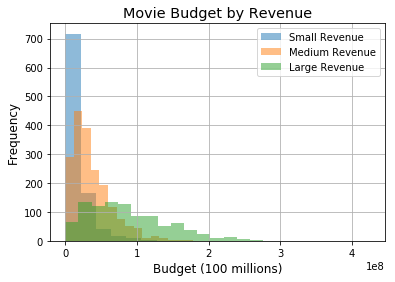

In [113]:
#plot triple histogram that represents each revenue category's budget.
df.budget_adj[s_revenue].hist(alpha= .5, bins= 20, label= 'Small Revenue')
df.budget_adj[m_revenue].hist(alpha= .5, bins= 20, label= 'Medium Revenue')
df.budget_adj[l_revenue].hist(alpha= .5, bins= 20, label= 'Large Revenue')
plt.legend()
plt.xlabel('Budget (100 millions)', size='large')
plt.ylabel('Frequency', size='large')
plt.title('Movie Budget by Revenue', size='x-large');

Small revenue movies tend to have smaller budgets while large revenue movies tend to have larger (and more vaired) budgets.

In [114]:
def revenue_bar(df, column, moc):
    """plots a bar graph grouped by revenue category compared with provided column and measure of center
        column, moc provided as strings"""
    rev_cats = [l_revenue, m_revenue, s_revenue]
    
    if column == 'budget_adj' and moc == 'mean':
        df.groupby(rev_cats).budget_adj.mean().plot(kind='bar')
    elif column == 'budget_adj' and moc == 'median':
        df.groupby(rev_cats).budget_adj.median().plot(kind='bar')
    elif column == 'vote_average' and moc == 'mean':
        df.groupby(rev_cats).vote_average.mean().plot(kind='bar')
    elif column == 'vote_average' and moc == 'median':
        df.groupby(rev_cats).vote_average.median().plot(kind='bar')
    else:
        print('Please enter valid parameters')
        return
    

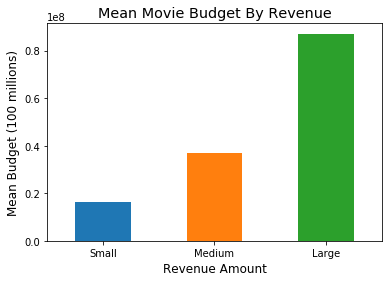

In [115]:
#create bar graph grouped by revenue that shows mean budget
revenue_bar(df, 'budget_adj', 'mean')

plt.xticks([0, 1, 2], ('Small', 'Medium', 'Large'), rotation= 0)
plt.title('Mean Movie Budget By Revenue', size='x-large')
plt.xlabel('Revenue Amount', size='large')
plt.ylabel('Mean Budget (100 millions)', size='large');

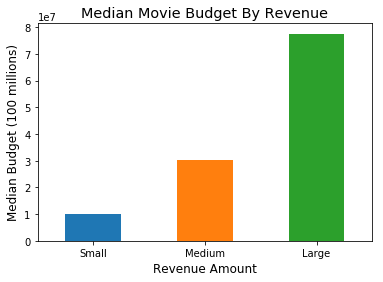

In [116]:
#create bar graph grouped by revenue that shows median budget
revenue_bar(df, 'budget_adj', 'median')

plt.xticks([0, 1, 2], ('Small', 'Medium', 'Large'), rotation= 0)
plt.title('Median Movie Budget By Revenue', size='x-large')
plt.xlabel('Revenue Amount', size='large')
plt.ylabel('Median Budget (100 millions)', size='large');

This same trend is true for the mean and median budgets as well.

<a id='eda'></a>
### Rating

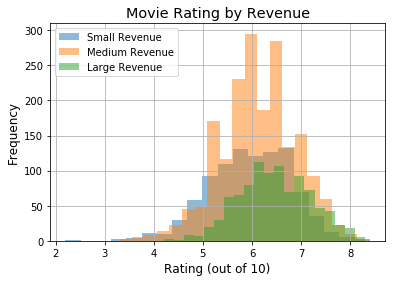

In [117]:
#plot triple histogram that represents each revenue category's rating.
df.vote_average[s_revenue].hist(alpha= .5, bins= 20, label= 'Small Revenue')
df.vote_average[m_revenue].hist(alpha= .5, bins= 20, label= 'Medium Revenue')
df.vote_average[l_revenue].hist(alpha= .5, bins= 20, label= 'Large Revenue')
plt.legend()
plt.xlabel('Rating (out of 10)', size='large')
plt.ylabel('Frequency', size='large')
plt.title('Movie Rating by Revenue', size='x-large');

All three revenue categories appear to have similar ratings.

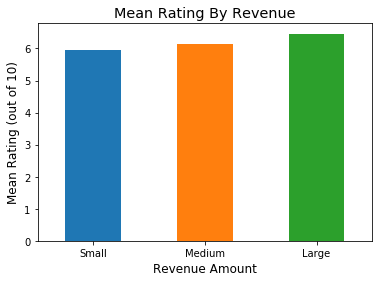

In [118]:
#create bar graph grouped by revenue that shows mean rating
revenue_bar(df, 'vote_average', 'mean')

plt.xticks([0, 1, 2], ('Small', 'Medium', 'Large'), rotation= 0)
plt.title('Mean Rating By Revenue', size='x-large')
plt.xlabel('Revenue Amount', size='large')
plt.ylabel('Mean Rating (out of 10)', size='large');

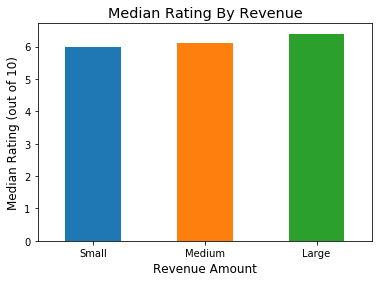

In [119]:
#create bar graph grouped by revenue that shows median rating
revenue_bar(df, 'vote_average', 'median')

plt.xticks([0, 1, 2], ('Small', 'Medium', 'Large'), rotation= 0)
plt.title('Median Rating By Revenue', size='x-large')
plt.xlabel('Revenue Amount', size='large')
plt.ylabel('Median Rating (out of 10)', size='large');

Mean and median ratings appear to be very close, but with a slight upward trend as budget increases.

<a id='eda'></a>
### Genre

In [120]:
#make dataframes for the 5 genres to be investigated
action = df[df['genres'].str.contains('Action')]
drama = df[df['genres'].str.contains('Drama')]
comedy = df[df['genres'].str.contains('Comedy')]
horror = df[df['genres'].str.contains('Horror')]
romance = df[df['genres'].str.contains('Romance')]

The 5 genres to be investigated are action, drama, comedy, horror, and romance.

In [121]:
#calculate and store mean revenue for each genre
mean_action_rev = action['revenue_adj'].mean()
mean_drama_rev = drama['revenue_adj'].mean()
mean_comedy_rev = comedy['revenue_adj'].mean()
mean_horror_rev = horror['revenue_adj'].mean()
mean_romance_rev = romance['revenue_adj'].mean()

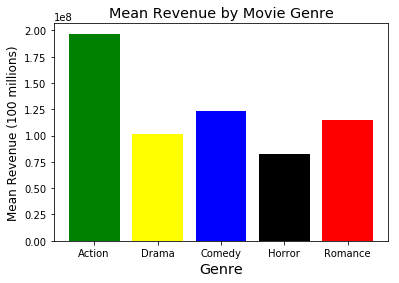

In [122]:
#plot bar graph showing mean revenue by genre
bar_locs = [.5, 1.5, 2.5, 3.5, 4.5]
colors = ['green', 'yellow', 'blue', 'black', 'red']
plt.bar(bar_locs, [mean_action_rev, mean_drama_rev, mean_comedy_rev, mean_horror_rev, mean_romance_rev], color= colors)
plt.xticks(bar_locs,('Action', 'Drama', 'Comedy', 'Horror', 'Romance'))
plt.xlabel('Genre', size='x-large')
plt.ylabel('Mean Revenue (100 millions)', size='large')
plt.title('Mean Revenue by Movie Genre', size='x-large');

Action movies typically have higher revenues than other genres, while horror movies typically have lower revenues.

### Do profitable movies have different characteristics than nonprofitable movies?

In [123]:
#create masks for profitable and nonprofitable movies
profit = df.budget_adj < df.revenue_adj
no_profit = df.budget_adj >= df.revenue_adj

<a id='eda'></a>
### Profitable

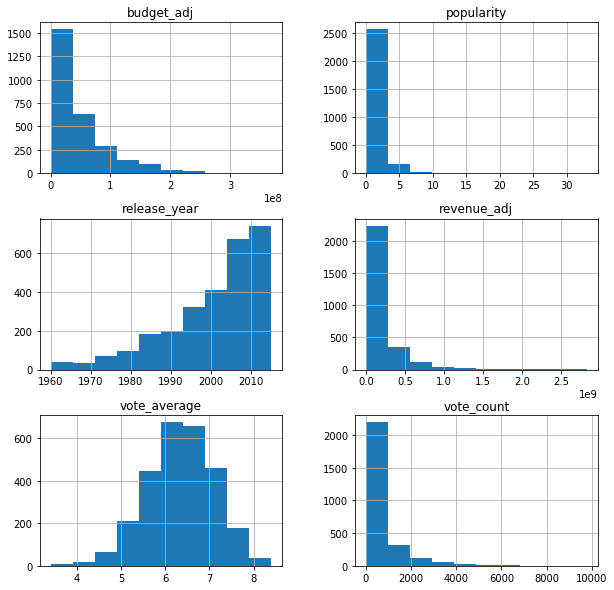

In [124]:
#display histograms for profitable movies
df[profit].hist(figsize= (10, 10));

<a id='eda'></a>
### Nonprofitable

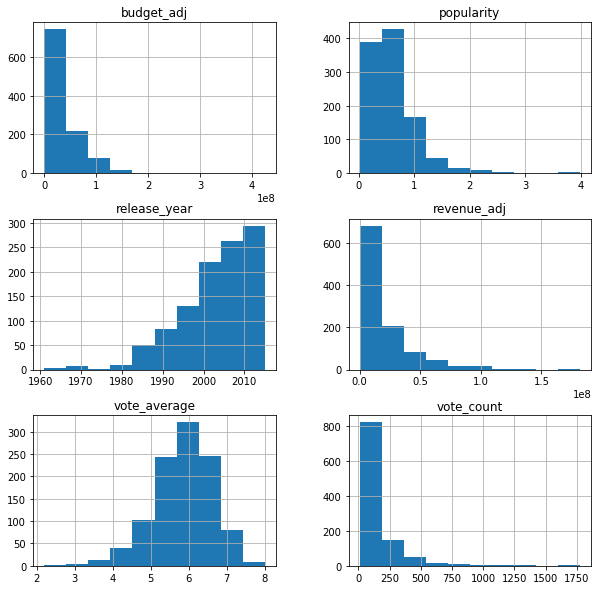

In [125]:
#display histograms for nonprofitable movies
df[no_profit].hist(figsize= (10, 10));

Histograms all appear to have similar distributions between profitable movies and nonprofitable movies.

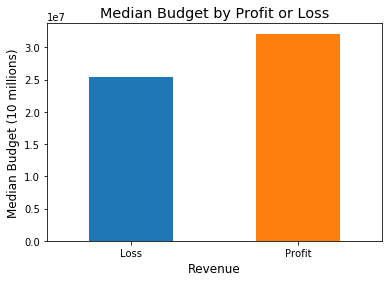

In [126]:
#create bar graph grouped by profitable and nonprofitable that shows median budget
df.groupby([profit, no_profit]).budget_adj.median().plot(kind='bar')

plt.xticks([0, 1], ('Loss', 'Profit'), rotation= 0)
plt.title('Median Budget by Profit or Loss', size='x-large')
plt.ylabel('Median Budget (10 millions)', size='large')
plt.xlabel('Revenue', size= 'large');

Movies that are profitable tend to have higher budgets.

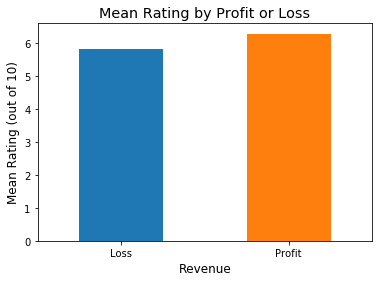

In [127]:
#create bar graph grouped by profitable and nonprofitable that shows mean rating
df.groupby([profit, no_profit]).vote_average.mean().plot(kind='bar')

plt.xticks([0, 1], ('Loss', 'Profit'), rotation= 0)
plt.title('Mean Rating by Profit or Loss', size='x-large')
plt.ylabel('Mean Rating (out of 10)', size='large')
plt.xlabel('Revenue', size ='large');

Mean rating is only slightly higher for profitable movies.

<a id='conclusions'></a>
## Conclusions

When comparing movie revenues to budget, it appears that a higher budget is often associated with more revenue, as the mean and median budgets were positively correlated with revenue. Movie revenues and average movie rating were positively correlated as well, but rating appeared to make less of a difference in revenue than budget. Movie revenues and genre showed that action movies typically had higher revenues than other genres, and horror movies typically resulted in lower revenues. 

Analyzing different characteristics of movies that resulted in a profit versus movies that did not showed similar distributions between the two. It appeared movies that resulted in a profit typically had higher budgets and average ratings than movies that did not turn a profit.

### Limitations

Over half of the data was missing values for revenue, budget, or both and thus had to be omitted from the analysis. This limited the sample size compared to the original data set. In addition, statistical tests were not run so conclusions are drawn based on graphs and measures of center only. This may mean some differences and correlations are more or less significant than they seem. Thus, it cannot be concluded that these factors have significant correlation to movie revenue, only inferred.


In [128]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0